In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import linregress

In [2]:
exp7_1_df = pd.read_csv('./csv/exp7_1.csv', sep=';')

In [3]:
exp7_2_df = pd.read_csv('./csv/exp7_2.csv', sep=';')

In [4]:
exp7_1_df.columns

Index(['Timestamp', 'Relative_Time', 'PT-F03_raw (mV)',
       'PT-F03_processed (atm)', 'HPL4_raw'],
      dtype='object')

In [5]:
# Эксперимент 7_1

In [6]:
ptm_processed = exp7_1_df['PT-F03_processed (atm)']
hpl_raw = exp7_1_df['HPL4_raw']
relative_time = exp7_1_df['Relative_Time']

In [7]:
# 2. Вычислим коэффициент корреляции Пирсона
correlation, p_value = pearsonr(ptm_processed, hpl_raw)
print(f'Коэффициент корреляции: {correlation:.5f}')
print(f'p-value: {p_value:.20e}')

Коэффициент корреляции: 0.99785
p-value: 0.00000000000000000000e+00


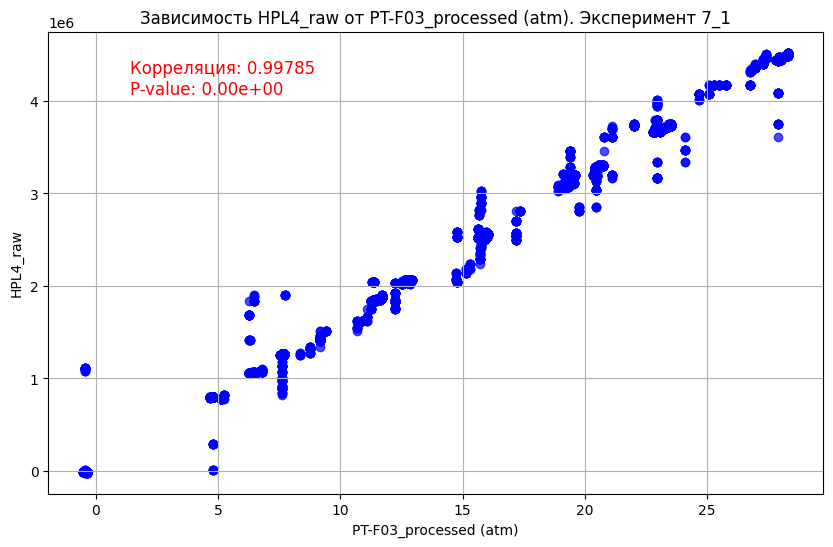

In [8]:
# 1. Построим график зависимости одного датчика от другого
plt.figure(figsize=(10, 6))
plt.scatter(ptm_processed, hpl_raw, alpha=0.7, color='b')
plt.title('Зависимость HPL4_raw от PT-F03_processed (atm). Эксперимент 7_1')
plt.xlabel('PT-F03_processed (atm)')
plt.ylabel('HPL4_raw')
plt.grid()

text = f"Корреляция: {correlation:.5f}\nP-value: {p_value:.2e}"
plt.text(max(ptm_processed) * 0.05, max(hpl_raw) * 0.9, text, fontsize=12, color='red')

# Сохраняем график
plt.savefig(f'./results/HPL4_raw_PT-F03_processed_exp7_1.png')

plt.show()

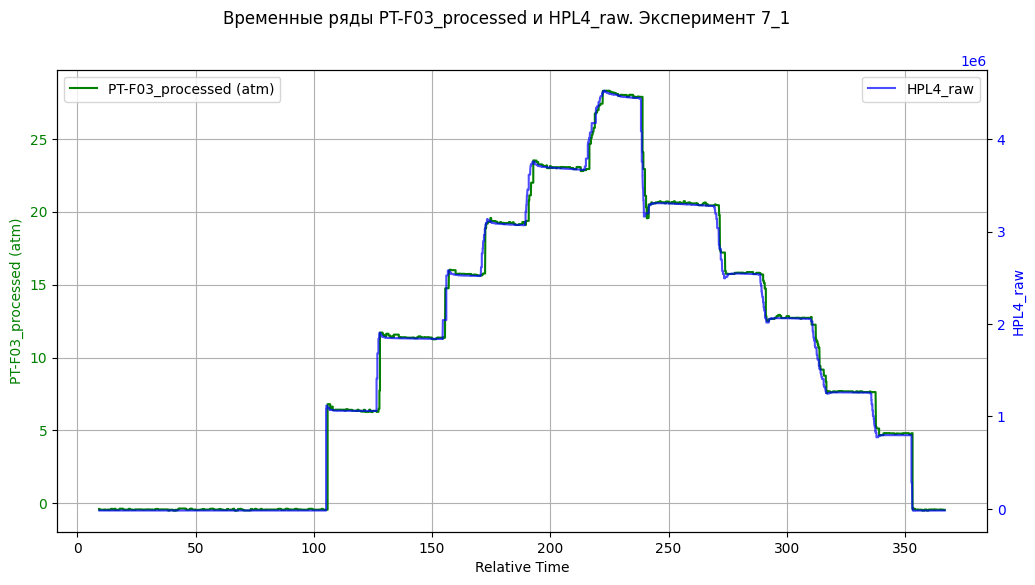

In [9]:
# 3. Построим временные ряды с двумя осями Y
fig, ax1 = plt.subplots(figsize=(12, 6))

# Первая ось Y для PT-F03_processed (atm)
ax1.plot(relative_time, ptm_processed, label='PT-F03_processed (atm)', color='g')
ax1.set_xlabel('Relative Time')
ax1.set_ylabel('PT-F03_processed (atm)', color='g')
ax1.tick_params(axis='y', labelcolor='g')
ax1.grid()

# Вторая ось Y для HPL4_raw
ax2 = ax1.twinx()  # Создаем вторую ось Y
ax2.plot(relative_time, hpl_raw, label='HPL4_raw', color='b', alpha=0.7)
ax2.set_ylabel('HPL4_raw', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Добавим легенду и заголовок
fig.suptitle('Временные ряды PT-F03_processed и HPL4_raw. Эксперимент 7_1')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Сохраняем график
plt.savefig(f'./results/Relative_Time_HPL4_raw_PT-F03_processed_exp7_1.png')

plt.show()

In [10]:
# Эксперимент 7_2

In [11]:
ptm_processed = exp7_2_df['PT-F03_processed (atm)']
hpl_raw = exp7_2_df['HPL4_raw']
relative_time = exp7_2_df['Relative_Time']

In [12]:
# 2. Вычислим коэффициент корреляции Пирсона
correlation, p_value = pearsonr(ptm_processed, hpl_raw)
print(f'Коэффициент корреляции: {correlation:.5f}')
print(f'p-value: {p_value:.20e}')

Коэффициент корреляции: 0.99156
p-value: 0.00000000000000000000e+00


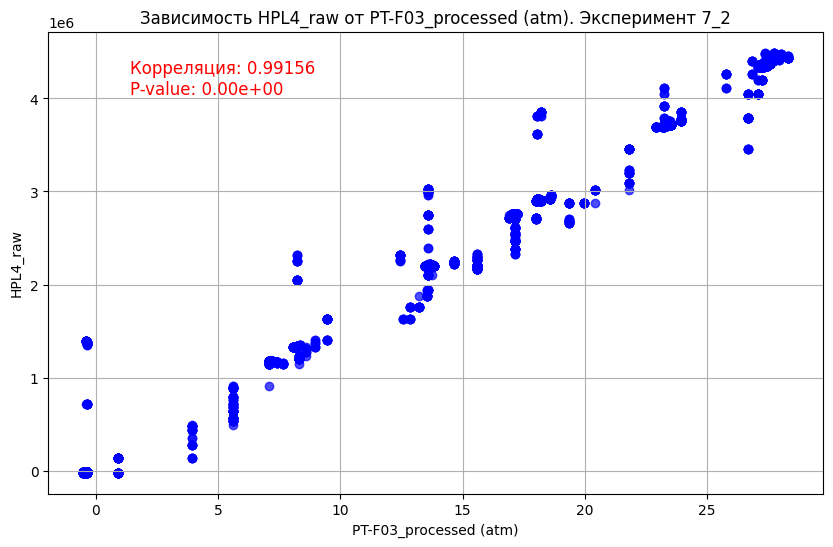

In [13]:
# 1. Построим график зависимости одного датчика от другого
plt.figure(figsize=(10, 6))
plt.scatter(ptm_processed, hpl_raw, alpha=0.7, color='b')
plt.title('Зависимость HPL4_raw от PT-F03_processed (atm). Эксперимент 7_2')
plt.xlabel('PT-F03_processed (atm)')
plt.ylabel('HPL4_raw')
plt.grid()
text = f"Корреляция: {correlation:.5f}\nP-value: {p_value:.2e}"
plt.text(max(ptm_processed) * 0.05, max(hpl_raw) * 0.9, text, fontsize=12, color='red')

# Сохраняем график
plt.savefig(f'./results/HPL4_raw_PT-F03_processed_exp7_2.png')

plt.show()

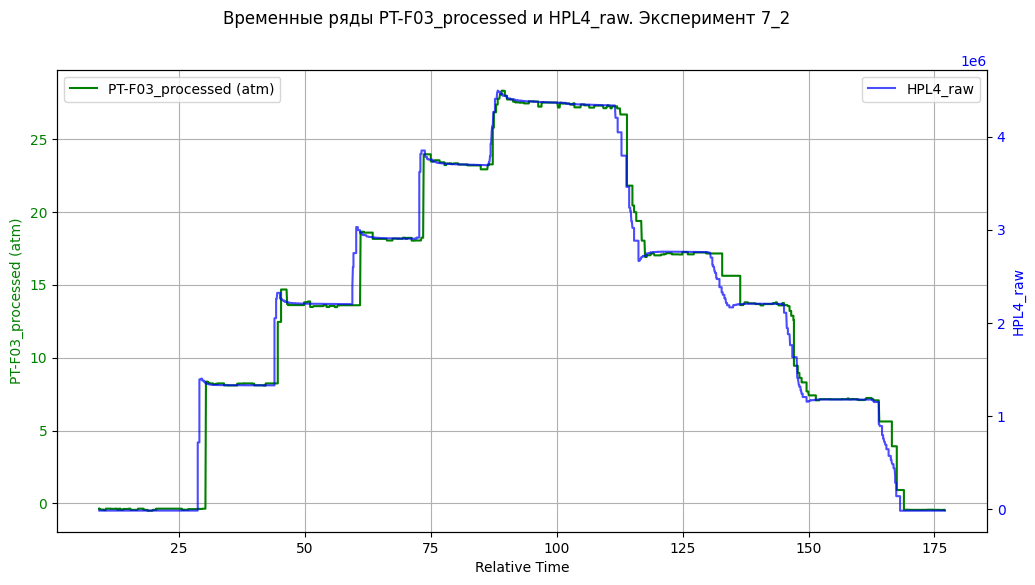

In [14]:
# 3. Построим временные ряды с двумя осями Y
fig, ax1 = plt.subplots(figsize=(12, 6))

# Первая ось Y для PT-F03_processed (atm)
ax1.plot(relative_time, ptm_processed, label='PT-F03_processed (atm)', color='g')
ax1.set_xlabel('Relative Time')
ax1.set_ylabel('PT-F03_processed (atm)', color='g')
ax1.tick_params(axis='y', labelcolor='g')
ax1.grid()

# Вторая ось Y для HPL4_raw
ax2 = ax1.twinx()  # Создаем вторую ось Y
ax2.plot(relative_time, hpl_raw, label='HPL4_raw', color='b', alpha=0.7)
ax2.set_ylabel('HPL4_raw', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Добавим легенду и заголовок
fig.suptitle('Временные ряды PT-F03_processed и HPL4_raw. Эксперимент 7_2')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Сохраняем график
plt.savefig(f'./results/Relative_Time_HPL4_raw_PT-F03_processed_exp7_2.png')

plt.show()

In [16]:
# Объединяем данные из двух датафреймов
combined_df = pd.concat([exp7_1_df, exp7_2_df], ignore_index=True)

In [24]:
# Исходные данные из колонок
y = combined_df['PT-F03_processed (atm)']
x = combined_df['HPL4_raw'] 

# Линейная регрессия
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Вывод коэффициентов
print(f"Уравнение прямой: y = {slope:.10f} * x + {intercept:.10f}")
print(f"Стандартная ошибка: {std_err:.5f}")

Уравнение прямой: y = 0.0000063290 * x + -0.2749804631
Стандартная ошибка: 0.00000


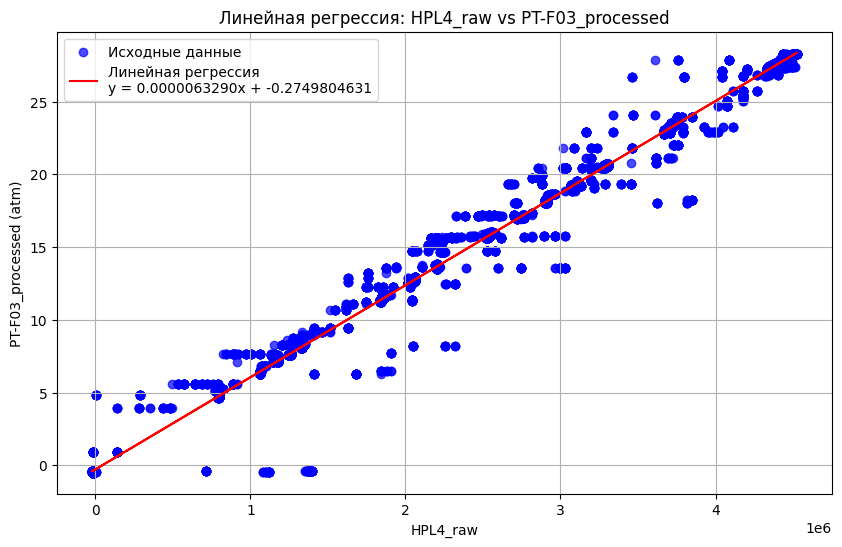

In [26]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, label='Исходные данные', color='blue')

# Линия регрессии
regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label=f'Линейная регрессия\ny = {slope:.10f}x + {intercept:.10f}')

# Подписи и легенда
plt.title('Линейная регрессия: HPL4_raw vs PT-F03_processed')
plt.ylabel('PT-F03_processed (atm)')
plt.xlabel('HPL4_raw')
plt.legend()
plt.grid()

# Сохраняем график
plt.savefig(f'./results/Regression.png')

plt.show()